In [1]:
# %load_ext autoreload
# %autoreload 2
import matplotlib.pyplot as plt
import numpy as np

from rsm import (
    boxplot,
    design_ccd,
    markout_profit,
    markout_profit_2D,
    run_experiment,
    run_experiment_2D,
)

## One-dimensional

In [2]:
np.random.seed(17)
thresholds = np.array([0.5, 1.0, 1.5])
aggregate_measurements, standard_errors = run_experiment(15_000, thresholds)

aggregate_measurements, standard_errors

([0.09848496576216006, 0.1711214205711533, 0.13699263220703944],
 [0.013267765976681866, 0.00957041724519083, 0.006796544642991194])

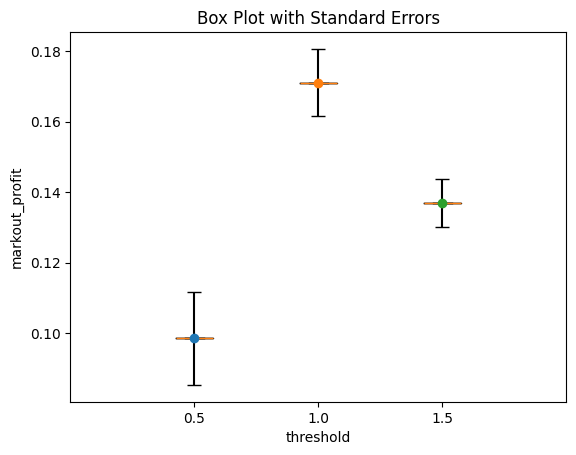

In [3]:
# Sample data
# For boxplot, every group should be an array of measurements,
# that is why we reshape the 1d array of aggregate measurements.
data = np.array(aggregate_measurements).reshape(1, -1)
std_err = standard_errors
positions = thresholds
boxplot(data, std_err, positions);

1.0900000000000005 0.1728575136117882


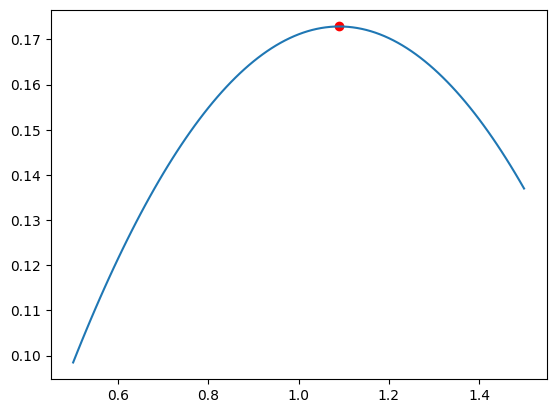

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(
    PolynomialFeatures(2, include_bias=False),
    LinearRegression(),
)
X = np.array(thresholds).reshape(-1, 1)
y = aggregate_measurements
pipe.fit(X, y)

xhat = np.arange(thresholds.min(), thresholds.max() + 1e-6, 0.01)
yhat = pipe.predict(xhat.reshape(-1, 1))


i = np.where(yhat == yhat.max())[0][0]
max_x = xhat[i]
max_y = yhat[i]
print(max_x, max_y)
plt.scatter(max_x, max_y, color="red", marker="o")
plt.plot(xhat, yhat);

## Two-dimensional

In [5]:
parameters = design_ccd(thresholds=[0.5, 1.0, 1.5], order_sizes=[1, 1.5, 2])
parameters

[(0.5, 1),
 (0.5, 1.5),
 (0.5, 2),
 (1.0, 1),
 (1.0, 1.5),
 (1.0, 2),
 (1.5, 1),
 (1.5, 1.5),
 (1.5, 2)]

In [6]:
np.random.seed(17)
# parameters = design_ccd(thresholds=[1, 1.5, 2], order_sizes=[1, 1.5, 2])
# parameters = design_ccd(thresholds=[0.5, 1, 1.5], order_sizes=[2.5, 3.0, 3.5])
parameters = design_ccd(
    thresholds=[0.75, 1, 1.25, 1.5], order_sizes=[2.50, 2.75, 3.00, 3.25]
)


aggregate_measurements, standard_errors = run_experiment_2D(15_000, parameters)
aggregate_measurements, standard_errors

([0.30744556997632777,
  0.2560506803463809,
  0.3026178788117962,
  0.21493676437867218,
  0.3790103875880683,
  0.35940956068262747,
  0.33586514322716504,
  0.3357399767316539,
  0.35164164993976343,
  0.36123180232740587,
  0.34700951670664987,
  0.3336247189764623,
  0.29776868799480377,
  0.3069166828245521,
  0.32895533060321797,
  0.3262428130785554],
 [0.02830456418972754,
  0.031188078972496352,
  0.0335666675288127,
  0.0365580408871248,
  0.023803424871864595,
  0.026143244974790612,
  0.028246438754562328,
  0.030162844684184027,
  0.019635653794035427,
  0.021619095293210044,
  0.022754980342395644,
  0.025091048257270494,
  0.01588068995919886,
  0.017958394499341435,
  0.01930297551017359,
  0.02106762511055883])

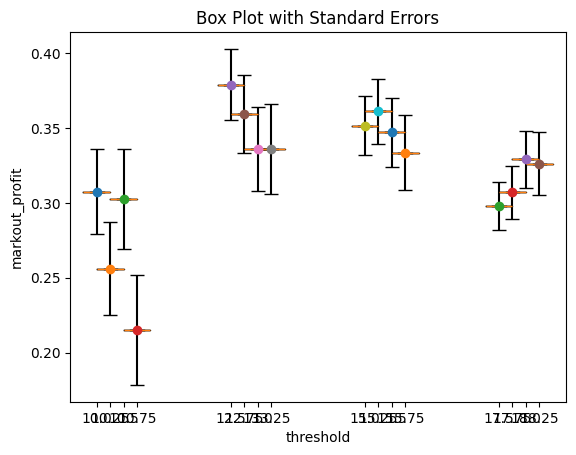

In [7]:
data = np.array(aggregate_measurements).reshape(1, -1)
std_err = standard_errors
positions = [i[0] * 10 + i[1] for i in parameters]
boxplot(data, std_err, positions);

In [8]:
pipe = make_pipeline(
    PolynomialFeatures(2, include_bias=False),
    LinearRegression(),
)
X = np.array(parameters).reshape(-1, 2)
y = aggregate_measurements
pipe.fit(X, y)

parameters = np.array(parameters)
x0 = np.arange(parameters[:, 0].min(), parameters[:, 0].max() + 1e-6, 0.01)
x1 = np.arange(parameters[:, 1].min(), parameters[:, 1].max() + 1e-6, 0.01)
xhat0, xhat1 = np.meshgrid(x0, x1)
xhat = np.array(list(zip(xhat0.flatten(), xhat1.flatten())))
yhat = pipe.predict(xhat.reshape(-1, 2))


i = np.where(yhat == yhat.max())[0][0]
max_x = xhat[i]
max_y = yhat[i]
print(max_x, max_y)

[1.11 2.52] 0.3675012919572507


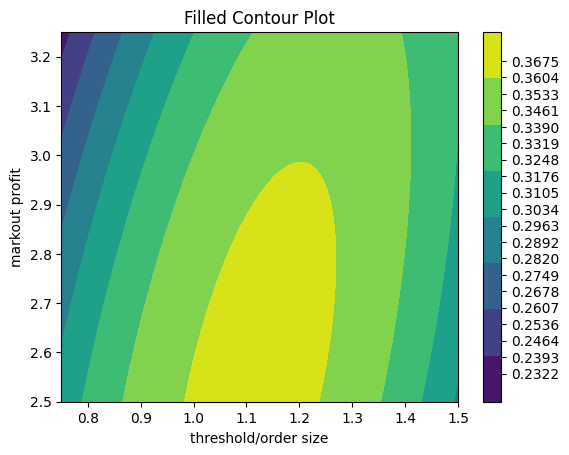

In [9]:
fig, ax = plt.subplots()


fill = ax.contourf(xhat0, xhat1, yhat.reshape(-1, xhat0.shape[0]))

# I want 20 "levels" to be shown
contour_breaks = 20
ticks = np.linspace(yhat.min(), yhat.max(), contour_breaks, endpoint=True)
fig.colorbar(fill, ticks=ticks)

ax.set_title("Filled Contour Plot")
ax.set_xlabel("threshold/order size")
ax.set_ylabel("markout profit")


plt.show()

In [10]:
aggregate_measurement, standard_error = run_experiment_2D(
    15_000, parameters=[tuple(max_x)]
)
aggregate_measurement, standard_error

([0.32877759590298944], [0.021909941453783756])

In [11]:
(
    aggregate_measurement[0] - 2 * standard_error[0],
    aggregate_measurement[0] + 2 * standard_error[0],
)

(0.28495771299542194, 0.37259747881055694)